<h2>Cohen Sutherland Line Clipping</h2>

Line accepted from 1.00, 85.70 to 21.43, 100.00


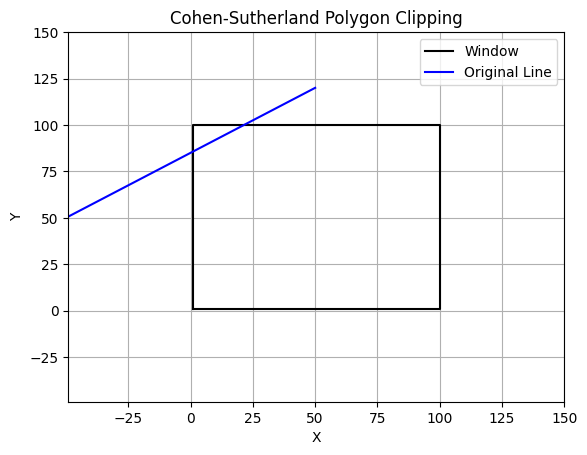

In [4]:
import matplotlib.pyplot as plt
def get_region_code(x,y,xmax,xmin,ymax,ymin):
    code=0
    if(x<xmin):
        code |= 1 #LEFT
    elif(x>xmax):
        code |= 2 #RIGHT
    if(y<ymin):
        code |= 4 #BOTTOM
    elif(y>ymax):
        code|= 8 #TOP
    
    return code

def intersection(x1,y1,x2,y2,xmax,xmin,ymax,ymin,code_out):
    # Find intersection point
    # using formulas y = y1 + slope * (x - x1),
    # x = x1 + (1 / slope) * (y - y1)
    if code_out & 8:
        # Point is above the clip rectangle
        x = x1 + (x2 - x1) * (ymax - y1) / (y2 - y1)
        y = ymax
    elif code_out & 4:
        # Point is below the clip rectangle
        x = x1 + (x2 - x1) * (ymin - y1) / (y2 - y1)
        y = ymin
    elif code_out & 2:
        # Point is to the right of the clip rectangle
        y = y1 + (y2 - y1) * (xmax - x1) / (x2 - x1)
        x = xmax
    elif code_out & 1:
        # Point is to the left of the clip rectangle
        y = y1 + (y2 - y1) * (xmin - x1) / (x2 - x1)
        x = xmin
    return x,y

def Cohen_Sutherland(x1,y1,x2,y2,xmax,xmin,ymax,ymin):
    code1 = get_region_code(x1,y1,xmax,xmin,ymax,ymin)
    code2 = get_region_code(x2,y2,xmax,xmin,ymax,ymin)
    
    accept=False
    while True:

        # If both endpoints lie within rectangle
        if code1 == 0 and code2 == 0:
            accept = True
            break

        # If both endpoints are outside rectangle
        elif (code1 & code2) != 0:
            break
            
        else:
            if code1 != 0:
                code_out = code1
            else:
                code_out = code2
                
            x,y = intersection(x1,y1,x2,y2,xmax,xmin,ymax,ymin,code_out)
            
            if code_out == code1:
                x1 = x
                y1 = y
                code1 = get_region_code(x1, y1,xmax,xmin,ymax,ymin)
            else:
                x2 = x
                y2 = y
                code2 = get_region_code(x2, y2,xmax,xmin,ymax,ymin)

    if accept:
        print("Line accepted from %.2f, %.2f to %.2f, %.2f" % (x1, y1, x2, y2))
    else:
        print("Line rejected")
        

#Example
x1=-50
y1=50
x2=50
y2=120
xmax=100
xmin=1
ymax=100
ymin=1
clipped_points = Cohen_Sutherland(x1, y1, x2, y2, xmax, xmin, ymax, ymin)

# Plotting
plt.plot([xmin, xmin, xmax, xmax, xmin], [ymin, ymax, ymax, ymin, ymin], 'k-', label='Window')  # Plot window
plt.plot([x1, x2], [y1, y2], 'b-', label='Original Line')  # Plot original line
if clipped_points:
    clipped_x = [point[0] for point in clipped_points]
    clipped_y = [point[1] for point in clipped_points]
    plt.plot(clipped_x, clipped_y, 'r-', label='Clipped Line')  # Plot clipped line
plt.xlim(xmin-50, xmax+50)
plt.ylim(ymin-50, ymax+50)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cohen-Sutherland Polygon Clipping')
plt.legend()
plt.grid(True)
plt.show()